In [1]:
from cortexlib.utils.plotting import plot_fev_vs_metric_scatter
from cortexlib.utils.plotting import simclr_colours, vgg19_colours
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import json

paths = [
    Path("../../../analysis/mouse_m01_d2/results/simclr_neural_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/simclr_neural_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/simclr_neural_m03_d4.json"),
    Path("../../../analysis/mouse_m01_d2/results/vgg19_neural_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/vgg19_neural_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/vgg19_neural_m03_d4.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 210 rows from 6 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,vgg19_neural,m01_d2,conv2_2,NaN,0.021,0.129,3.604,3.604,0.114,NaN,NaN
1,vgg19_neural,m01_d2,conv2_2,10.0,0.018,0.110,3.604,3.604,0.184,-0.099,-0.118
2,vgg19_neural,m01_d2,conv2_2,20.0,0.019,0.111,3.604,3.604,0.180,-0.094,-0.118
3,vgg19_neural,m01_d2,conv2_2,50.0,0.021,0.129,3.604,3.604,0.177,-0.087,-0.119
4,vgg19_neural,m01_d2,conv2_2,100.0,0.021,0.129,3.604,3.604,0.177,-0.091,-0.120
...,...,...,...,...,...,...,...,...,...,...,...
95,simclr_neural,m02_d3,fc,200.0,0.021,0.168,1.615,1.615,0.157,0.107,NaN
96,simclr_neural,m02_d3,fc,300.0,0.021,0.169,1.615,1.615,0.157,0.105,NaN
97,simclr_neural,m02_d3,fc,400.0,0.021,0.169,1.615,1.615,0.158,0.110,NaN
98,simclr_neural,m02_d3,fc,500.0,0.021,0.169,1.615,1.615,0.158,0.084,NaN


In [2]:
# Filter to only rows where n_pcs is 100 - standardise
df_pcs = df[(df["n_pcs"] == 100)]
df_pcs

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
4,vgg19_neural,m01_d2,conv2_2,100.0,0.021,0.129,3.604,3.604,0.177,-0.091,-0.120
9,vgg19_neural,m01_d2,conv3_4,100.0,0.018,0.109,2.465,2.465,0.199,-0.056,-0.136
14,vgg19_neural,m01_d2,conv4_4,100.0,0.019,0.128,2.099,2.099,0.160,0.000,-0.106
19,vgg19_neural,m01_d2,conv5_4,100.0,0.012,0.099,2.352,2.352,0.122,0.252,-0.118
24,simclr_neural,m01_d2,fc,100.0,0.024,0.160,1.651,1.651,0.214,0.108,-0.065
33,vgg19_neural,m01_d2,fc2,100.0,0.010,0.095,2.201,2.201,0.093,0.447,-0.112
38,simclr_neural,m01_d2,layer1,100.0,0.022,0.114,0.517,0.517,0.225,-0.114,-0.097
47,simclr_neural,m01_d2,layer2,100.0,0.043,0.178,0.738,0.738,0.233,-0.080,-0.076
56,simclr_neural,m01_d2,layer3,100.0,0.046,0.172,0.953,0.953,0.245,-0.005,-0.081
65,simclr_neural,m01_d2,layer4,100.0,0.029,0.132,1.123,1.123,0.193,0.085,-0.071


In [3]:
# Group by layer and compute mean of each metric
avg_metrics = df_pcs.groupby(["model_target", "layer"]).mean(numeric_only=True).reset_index()
avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,simclr_neural,fc,100.0,0.019000,0.121000,1.628667,1.628667,0.174333,0.108,-0.057667
1,simclr_neural,layer1,100.0,0.020333,0.109333,0.515667,0.515667,0.195000,-0.114,-0.105333
2,simclr_neural,layer2,100.0,0.039000,0.178333,0.740667,0.740667,0.209333,-0.080,-0.086000
3,simclr_neural,layer3,100.0,0.041000,0.168333,0.956667,0.956667,0.213333,-0.005,-0.080333
4,simclr_neural,layer4,100.0,0.026000,0.128000,1.127667,1.127667,0.165333,0.085,-0.073333
5,vgg19_neural,conv2_2,100.0,0.016667,0.109333,3.591333,3.591333,0.137000,-0.091,-0.124667
6,vgg19_neural,conv3_4,100.0,0.015000,0.099000,2.458667,2.458667,0.146333,-0.056,-0.130000
7,vgg19_neural,conv4_4,100.0,0.015000,0.121000,2.085667,2.085667,0.118333,0.000,-0.112000
8,vgg19_neural,conv5_4,100.0,0.009667,0.093333,2.307333,2.307333,0.091667,0.252,-0.118667
9,vgg19_neural,fc2,100.0,0.008000,0.091333,2.237333,2.237333,0.070667,0.447,-0.107333


In [4]:
# Get model name
avg_metrics["model"] = avg_metrics["model_target"].str.extract(r"(simclr|vgg19|gabor)")

# RSA: Compute SEM and merge
alpha_sem_df = df_pcs.groupby('layer')['alpha'].sem().reset_index()
alpha_sem_df.columns = ['layer', 'sem_alpha']
avg_metrics = avg_metrics.merge(alpha_sem_df, on='layer', how='left')

# FEV: Compute SEM and merge
fev_sem_df = df_pcs.groupby('layer')['mean_fev'].sem().reset_index()
fev_sem_df.columns = ['layer', 'sem_mean_fev']
avg_metrics = avg_metrics.merge(fev_sem_df, on='layer', how='left')

MAX_SEM = 0.005  # or test 0.025, 0.02
# avg_metrics['sem_mean_fev_plot'] = avg_metrics['sem_mean_fev'].clip(upper=MAX_SEM)
# avg_metrics['sem_alpha_plot'] = avg_metrics['sem_alpha'].clip(upper=MAX_SEM)
avg_metrics['sem_mean_fev_plot'] = avg_metrics['sem_mean_fev']
avg_metrics['sem_alpha_plot'] = avg_metrics['sem_alpha']

avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer,model,sem_alpha,sem_mean_fev,sem_mean_fev_plot,sem_alpha_plot
0,simclr_neural,fc,100.0,0.019000,0.121000,1.628667,1.628667,0.174333,0.108,-0.057667,simclr,0.011260,0.020599,0.020599,0.011260
1,simclr_neural,layer1,100.0,0.020333,0.109333,0.515667,0.515667,0.195000,-0.114,-0.105333,simclr,0.000667,0.004177,0.004177,0.000667
2,simclr_neural,layer2,100.0,0.039000,0.178333,0.740667,0.740667,0.209333,-0.080,-0.086000,simclr,0.001453,0.008950,0.008950,0.001453
3,simclr_neural,layer3,100.0,0.041000,0.168333,0.956667,0.956667,0.213333,-0.005,-0.080333,simclr,0.001856,0.009701,0.009701,0.001856
4,simclr_neural,layer4,100.0,0.026000,0.128000,1.127667,1.127667,0.165333,0.085,-0.073333,simclr,0.002404,0.009452,0.009452,0.002404
5,vgg19_neural,conv2_2,100.0,0.016667,0.109333,3.591333,3.591333,0.137000,-0.091,-0.124667,vgg19,0.010729,0.011552,0.011552,0.010729
6,vgg19_neural,conv3_4,100.0,0.015000,0.099000,2.458667,2.458667,0.146333,-0.056,-0.130000,vgg19,0.003180,0.008083,0.008083,0.003180
7,vgg19_neural,conv4_4,100.0,0.015000,0.121000,2.085667,2.085667,0.118333,0.000,-0.112000,vgg19,0.007055,0.008544,0.008544,0.007055
8,vgg19_neural,conv5_4,100.0,0.009667,0.093333,2.307333,2.307333,0.091667,0.252,-0.118667,vgg19,0.022400,0.006692,0.006692,0.022400
9,vgg19_neural,fc2,100.0,0.008000,0.091333,2.237333,2.237333,0.070667,0.447,-0.107333,vgg19,0.018187,0.006333,0.006333,0.018187


In [5]:
for model_name, group in avg_metrics.groupby('model'):
    r, p = spearmanr(group['alpha'], group['mean_fev'])
    print(f"{model_name}: Spearman r = {r:.3f}, p = {p:.3f}")

simclr: Spearman r = 0.000, p = 1.000
vgg19: Spearman r = 0.000, p = 1.000


/var/folders/_c/21m3vmjd7c1_75f4nxmg1k480000gn/T/ipykernel_73465/3523336689.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


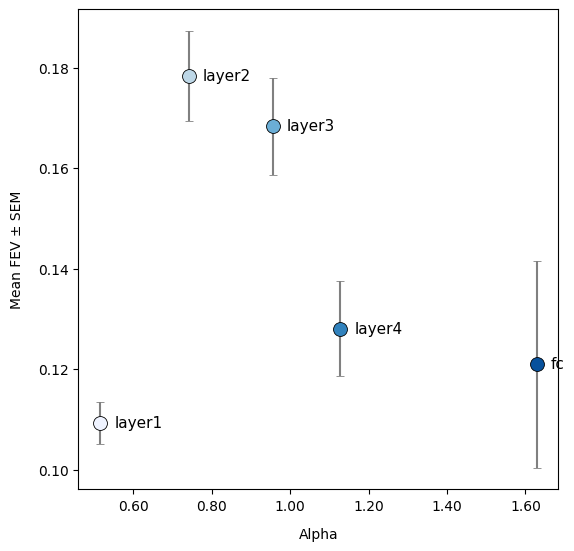

In [6]:
df_simclr = avg_metrics[avg_metrics["model"] == "simclr"]
fig = plot_fev_vs_metric_scatter(df_simclr, simclr_colours, "alpha", "Alpha",)
fig.savefig("../bar/figures/fev_vs_alpha_simclr_neural.svg", format='svg', bbox_inches='tight', dpi=300)
fig.show()

/var/folders/_c/21m3vmjd7c1_75f4nxmg1k480000gn/T/ipykernel_73465/2997786024.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


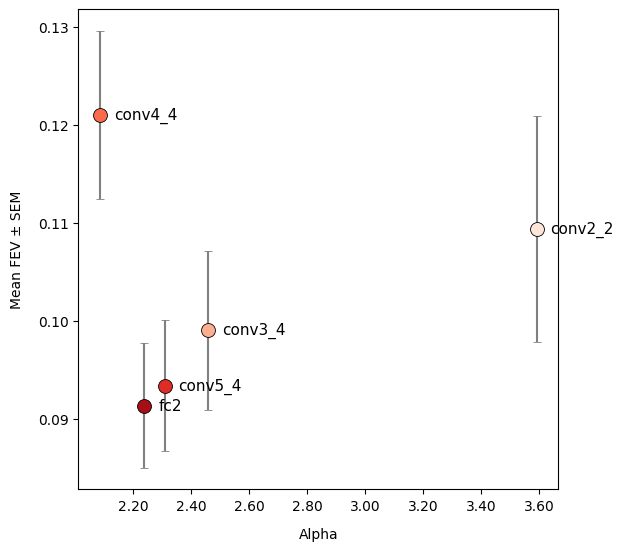

In [7]:
df_vgg19 = avg_metrics[avg_metrics["model"] == "vgg19"]
fig = plot_fev_vs_metric_scatter(df_vgg19, vgg19_colours, "alpha", "Alpha",)
fig.savefig("../bar/figures/fev_vs_alpha_vgg19_neural.svg", format='svg', bbox_inches='tight', dpi=300)
fig.show()